<center>ASSIGNMENT 2 - Bhavya Nagpal (VIT)</center>
<style>
    .rendered_html p {
        font-size: 30px;
        text-align:center;
    }
</style>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Download the Dataset

----

2. Laod the Dataset

In [4]:
data=pd.read_csv("titanic.csv")
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


----

3. Perform Visualizations

         - Univariate Analysis

Summary Statistics:
 count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: age, dtype: float64


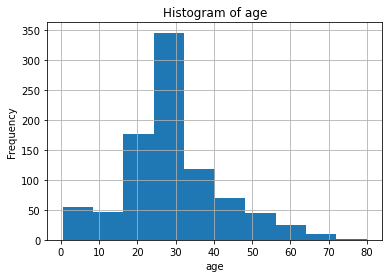

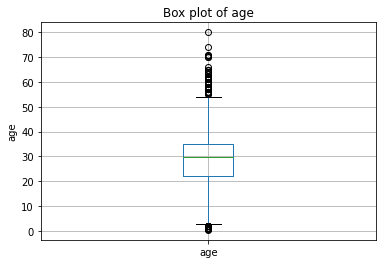

In [77]:
column = 'age'

summary_stats = data[column].describe()
print("Summary Statistics:\n", summary_stats)

data[column].hist()
plt.xlabel(column)
plt.ylabel("Frequency")
plt.title("Histogram of " + column)
plt.show()

data.boxplot(column=column)
plt.ylabel(column)
plt.title("Box plot of " + column)
plt.show()

            - Bivariate Analysis

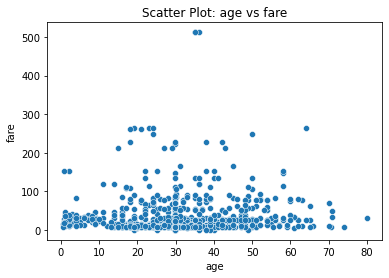

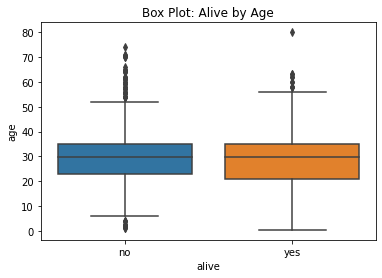

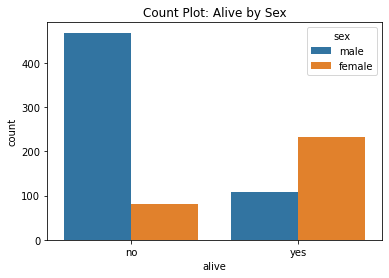

In [78]:
variable1 = 'age'
variable2 = 'fare'

sns.scatterplot(x=variable1, y=variable2, data=data)
plt.title("Scatter Plot: {} vs {}".format(variable1, variable2))
plt.show()

sns.boxplot(x='alive', y=variable1, data=data)
plt.title("Box Plot: {} by Age".format('Alive'))
plt.show()

sns.countplot(x='alive', hue='sex', data=data)
plt.title("Count Plot: Alive by Sex")
plt.show()

            - Multivariate Analysis

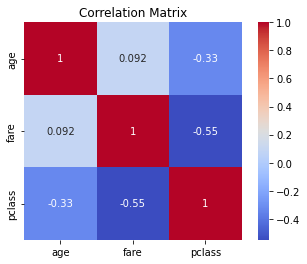

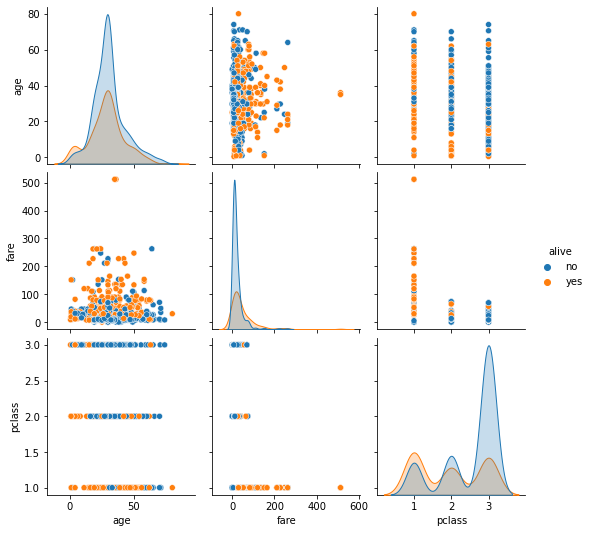

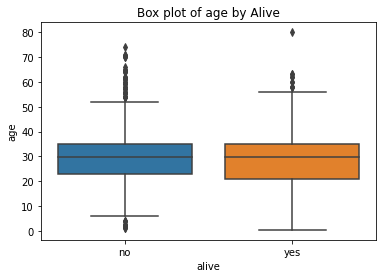

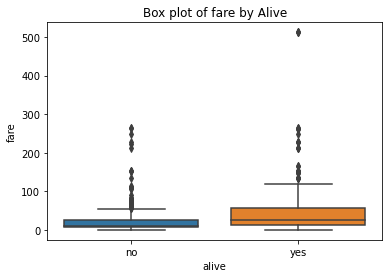

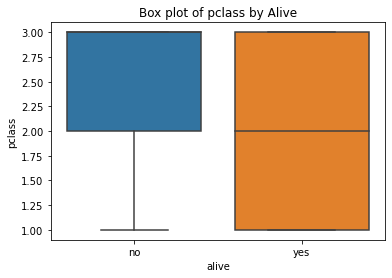

In [79]:
variables = ['age', 'fare', 'pclass', 'alive']

correlation_matrix = data[variables].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.show()

sns.pairplot(data[variables], hue='alive')
plt.show()

for variable in variables[:-1]:
    sns.boxplot(x='alive', y=variable, data=data)
    plt.title("Box plot of " + variable + " by Alive")
    plt.show()

----

4. Perform Descriptive Statistics on the Dataset

In [8]:
statistics = data.describe()
print(statistics)

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


----

5. Handle Missing Values

In [80]:
missing_values = data.isnull().sum()
print(missing_values)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64


In [82]:
data['age'].fillna(data['age'].mean(), inplace=True)
data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)

----

6. Find and Replace Outliers

Outliers in age: 
     survived  pclass     sex    age  sibsp  parch     fare embarked   class  \
7           0       3    male   2.00      3      1  21.0750        S   Third   
11          1       1  female  58.00      0      0  26.5500        S   First   
15          1       2  female  55.00      0      0  16.0000        S  Second   
16          0       3    male   2.00      4      1  29.1250        Q   Third   
33          0       2    male  66.00      0      0  10.5000        S  Second   
..        ...     ...     ...    ...    ...    ...      ...      ...     ...   
827         1       2    male   1.00      0      2  37.0042        C  Second   
829         1       1  female  62.00      0      0  80.0000        S   First   
831         1       2    male   0.83      1      1  18.7500        S  Second   
851         0       3    male  74.00      0      0   7.7750        S   Third   
879         1       1  female  56.00      0      1  83.1583        C   First   

       who  adult_mal

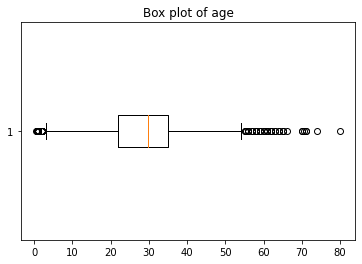

In [83]:
column='age'
summary_stats = data[column].describe()

Q1 = summary_stats['25%']
Q3 = summary_stats['75%']
IQR = Q3 - Q1

lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

outliers = data[(data[column] < lower_threshold) | (data[column] > upper_threshold)]

print("Outliers in {}: \n{}".format(column, outliers))

plt.boxplot(data[column], vert=False)
plt.title("Box plot of {}".format(column))
plt.show()

In [84]:
data_no_outliers = data[(data[column] >= lower_threshold) & (data[column] <= upper_threshold)]

print(len(data)-len(outliers))

825


In [66]:
data_no_outliers

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


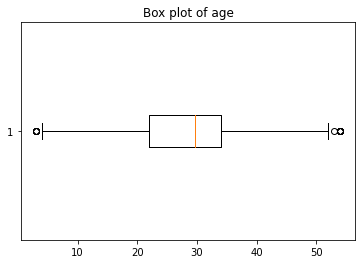

In [85]:
plt.boxplot(data_no_outliers[column], vert=False)
plt.title("Box plot of {}".format(column))
plt.show()

----

7. Check for Categorical Columns and Perform Encoding

In [86]:
from sklearn.preprocessing import LabelEncoder
categorical_cols=['sex','embarked','class','who','adult_male','embark_town','alone']

encoded_data = pd.get_dummies(data=data_no_outliers, columns=categorical_cols)

encoded_data

,survived,pclass,age,sibsp,parch,fare,alive,sex_female,sex_male,embarked_C,...,who_child,who_man,who_woman,adult_male_False,adult_male_True,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alone_False,alone_True
0,0,3,22.000000,1,0,7.2500,no,0,1,0,...,0,1,0,0,1,0,0,1,1,0
1,1,1,38.000000,1,0,71.2833,yes,1,0,1,...,0,0,1,1,0,1,0,0,1,0
2,1,3,26.000000,0,0,7.9250,yes,1,0,0,...,0,0,1,1,0,0,0,1,0,1
3,1,1,35.000000,1,0,53.1000,yes,1,0,0,...,0,0,1,1,0,0,0,1,1,0
4,0,3,35.000000,0,0,8.0500,no,0,1,0,...,0,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,no,0,1,0,...,0,1,0,0,1,0,0,1,0,1
887,1,1,19.000000,0,0,30.0000,yes,1,0,0,...,0,0,1,1,0,0,0,1,0,1
888,0,3,29.699118,1,2,23.4500,no,1,0,0,...,0,0,1,1,0,0,0,1,1,0
889,1,1,26.000000,0,0,30.0000,yes,0,1,1,...,0,1,0,0,1,1,0,0,0,1


----

8. Split Data into Dependent and Independent Variables

In [87]:
dependent_variable = 'alive'
y = encoded_data[dependent_variable]

independent_variables = encoded_data.drop(dependent_variable, axis=1)

print('Independent Variables\n')
print(independent_variables.head())
print('\nDependent Variable\n')
print(y.head())

Independent Variables

   survived  pclass   age  sibsp  parch     fare  sex_female  sex_male  \
0         0       3  22.0      1      0   7.2500           0         1   
1         1       1  38.0      1      0  71.2833           1         0   
2         1       3  26.0      0      0   7.9250           1         0   
3         1       1  35.0      1      0  53.1000           1         0   
4         0       3  35.0      0      0   8.0500           0         1   

   embarked_C  embarked_Q  ...  who_child  who_man  who_woman  \
0           0           0  ...          0        1          0   
1           1           0  ...          0        0          1   
2           0           0  ...          0        0          1   
3           0           0  ...          0        0          1   
4           0           0  ...          0        1          0   

   adult_male_False  adult_male_True  embark_town_Cherbourg  \
0                 0                1                      0   
1              

----

9. Scale the Independent Variables

In [88]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_independent_variables = scaler.fit_transform(independent_variables)

scaled_data = pd.DataFrame(scaled_independent_variables, columns=independent_variables.columns)

print(scaled_data.head())

   survived  pclass       age  sibsp  parch      fare  sex_female  sex_male  \
0       0.0     1.0  0.372549  0.125    0.0  0.014151         0.0       1.0   
1       1.0     0.0  0.686275  0.125    0.0  0.139136         1.0       0.0   
2       1.0     1.0  0.450980  0.000    0.0  0.015469         1.0       0.0   
3       1.0     0.0  0.627451  0.125    0.0  0.103644         1.0       0.0   
4       0.0     1.0  0.627451  0.000    0.0  0.015713         0.0       1.0   

   embarked_C  embarked_Q  ...  who_child  who_man  who_woman  \
0         0.0         0.0  ...        0.0      1.0        0.0   
1         1.0         0.0  ...        0.0      0.0        1.0   
2         0.0         0.0  ...        0.0      0.0        1.0   
3         0.0         0.0  ...        0.0      0.0        1.0   
4         0.0         0.0  ...        0.0      1.0        0.0   

   adult_male_False  adult_male_True  embark_town_Cherbourg  \
0               0.0              1.0                    0.0   
1       

----

10. Split Data into Training and Testing

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (660, 24)
Shape of X_test: (165, 24)
Shape of y_train: (660,)
Shape of y_test: (165,)


----

<center> xxxx </center>